In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

import glob
from dust_extinction.dust import extinction_cal

In [2]:
%matplotlib notebook

In [3]:
# meta data
z = 0.0094
tb_max = 58863.34
t_fl = -17.4928

In [4]:
def plot_box_spec(wave, flux): 
    flux_plot = np.repeat(flux, 2)
    wv_plot = wave.copy()
    wv_plot[:-1] += np.diff(wave)/2
    wv_plot = np.append(wave[0]-(wave[1]-wave[0])/2, 
                        np.append(np.repeat(wv_plot[0:-1], 2), 
                                  wave[-1]+(wave[-1]-wave[-2])/2))
    
    return wv_plot, flux_plot

## WiseRep spectra of 86G have offset wavelength scales

In [5]:
comp_dir = '../data/comp_sne/'

spec_86G_red = comp_dir + '1986G_1986-05-07_04-48-00_ESO-1.5m_BC-ESO_SUSPECT.dat' # Cristiani+1992
spec_86G_df_red = pd.read_csv(spec_86G_red, comment='#', delim_whitespace=True, header=None)

spec_86G_full = comp_dir + '1986G_1986-05-07_00-00-00_ESO-1.5m_BC-ESO_SUSPECT_0.dat' # Cristiani+1992
spec_86G_df_full = pd.read_csv(spec_86G_full, comment='#', delim_whitespace=True, header=None)

z_86G = 0.0018

wv_full, fl_full = spec_86G_df_full[0].values, spec_86G_df_full[1].values
wv_red, fl_red = spec_86G_df_red[0].values, spec_86G_df_red[1].values

off_array = np.linspace(110,120,41)
mse = np.zeros_like(off_array)
for off_num, offset in enumerate(off_array):
    red_mask = np.where(wv_red < np.min([np.max(wv_red), np.max(wv_full + offset)]))
    full_mask = np.where((wv_full + offset < np.min([np.max(wv_red), np.max(wv_full + offset)])) & 
                        (wv_full + offset > np.min(wv_red)))
    
    full_interp = np.interp(wv_red[red_mask], wv_full[full_mask] + offset, fl_full[full_mask])
    
    mse[off_num] = np.mean((full_interp*1e14-fl_red[red_mask]*1e14)**2)

print('Optimal offset = {}'.format(off_array[np.argmin(mse)]))

Optimal offset = 116.0


<IPython.core.display.Javascript object>


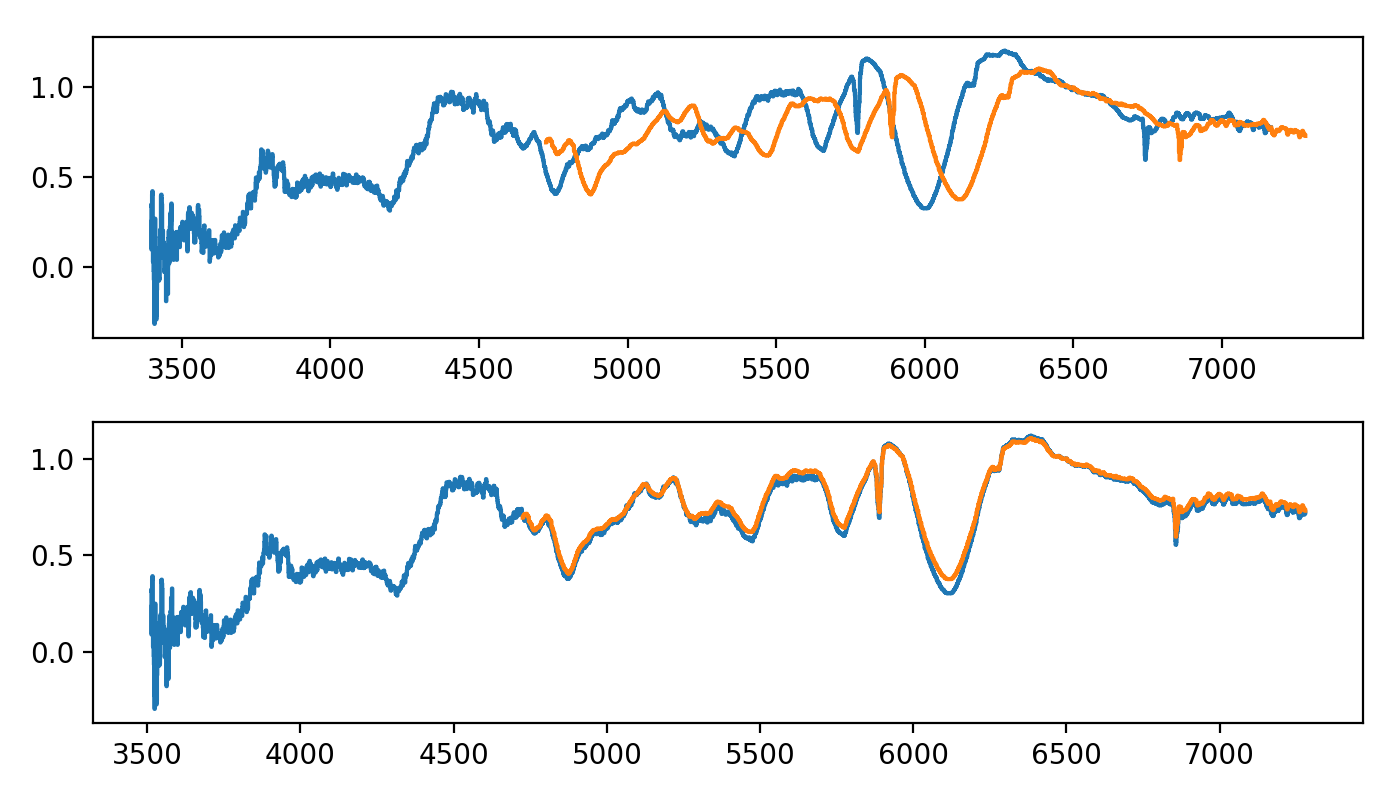

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,4))

wv, fl = plot_box_spec(spec_86G_df_full[0].values, spec_86G_df_full[1].values)
norm_flux = np.median(fl[np.where((wv > 6400) & (wv < 6600))])

ax1.plot(wv/(1+z_86G), fl/norm_flux)
lambda_offset = off_array[np.argmin(mse)]
norm_flux = np.median(fl[np.where((wv > 6400 - lambda_offset) & (wv < 6600 - lambda_offset))])
ax2.plot((wv+lambda_offset)/(1+z_86G), fl/norm_flux)

wv, fl = plot_box_spec(spec_86G_df_red[0].values, spec_86G_df_red[1].values)
norm_flux = np.median(fl[np.where((wv > 6400) & (wv < 6600))])

ax1.plot(wv/(1+z_86G), fl/norm_flux)
ax2.plot(wv/(1+z_86G), fl/norm_flux)

fig.tight_layout()

First spectrum -- No matches!

Matches to 2nd LT spectrum -- 2002bo -13
                              2004dt -9 (not quite as good)

Matches to the Keck spectrum -- 2005am +7.7
                                2002bo +4.9
                                1997bp +5 (???)
                                2002dj +5-10 (???)

<IPython.core.display.Javascript object>


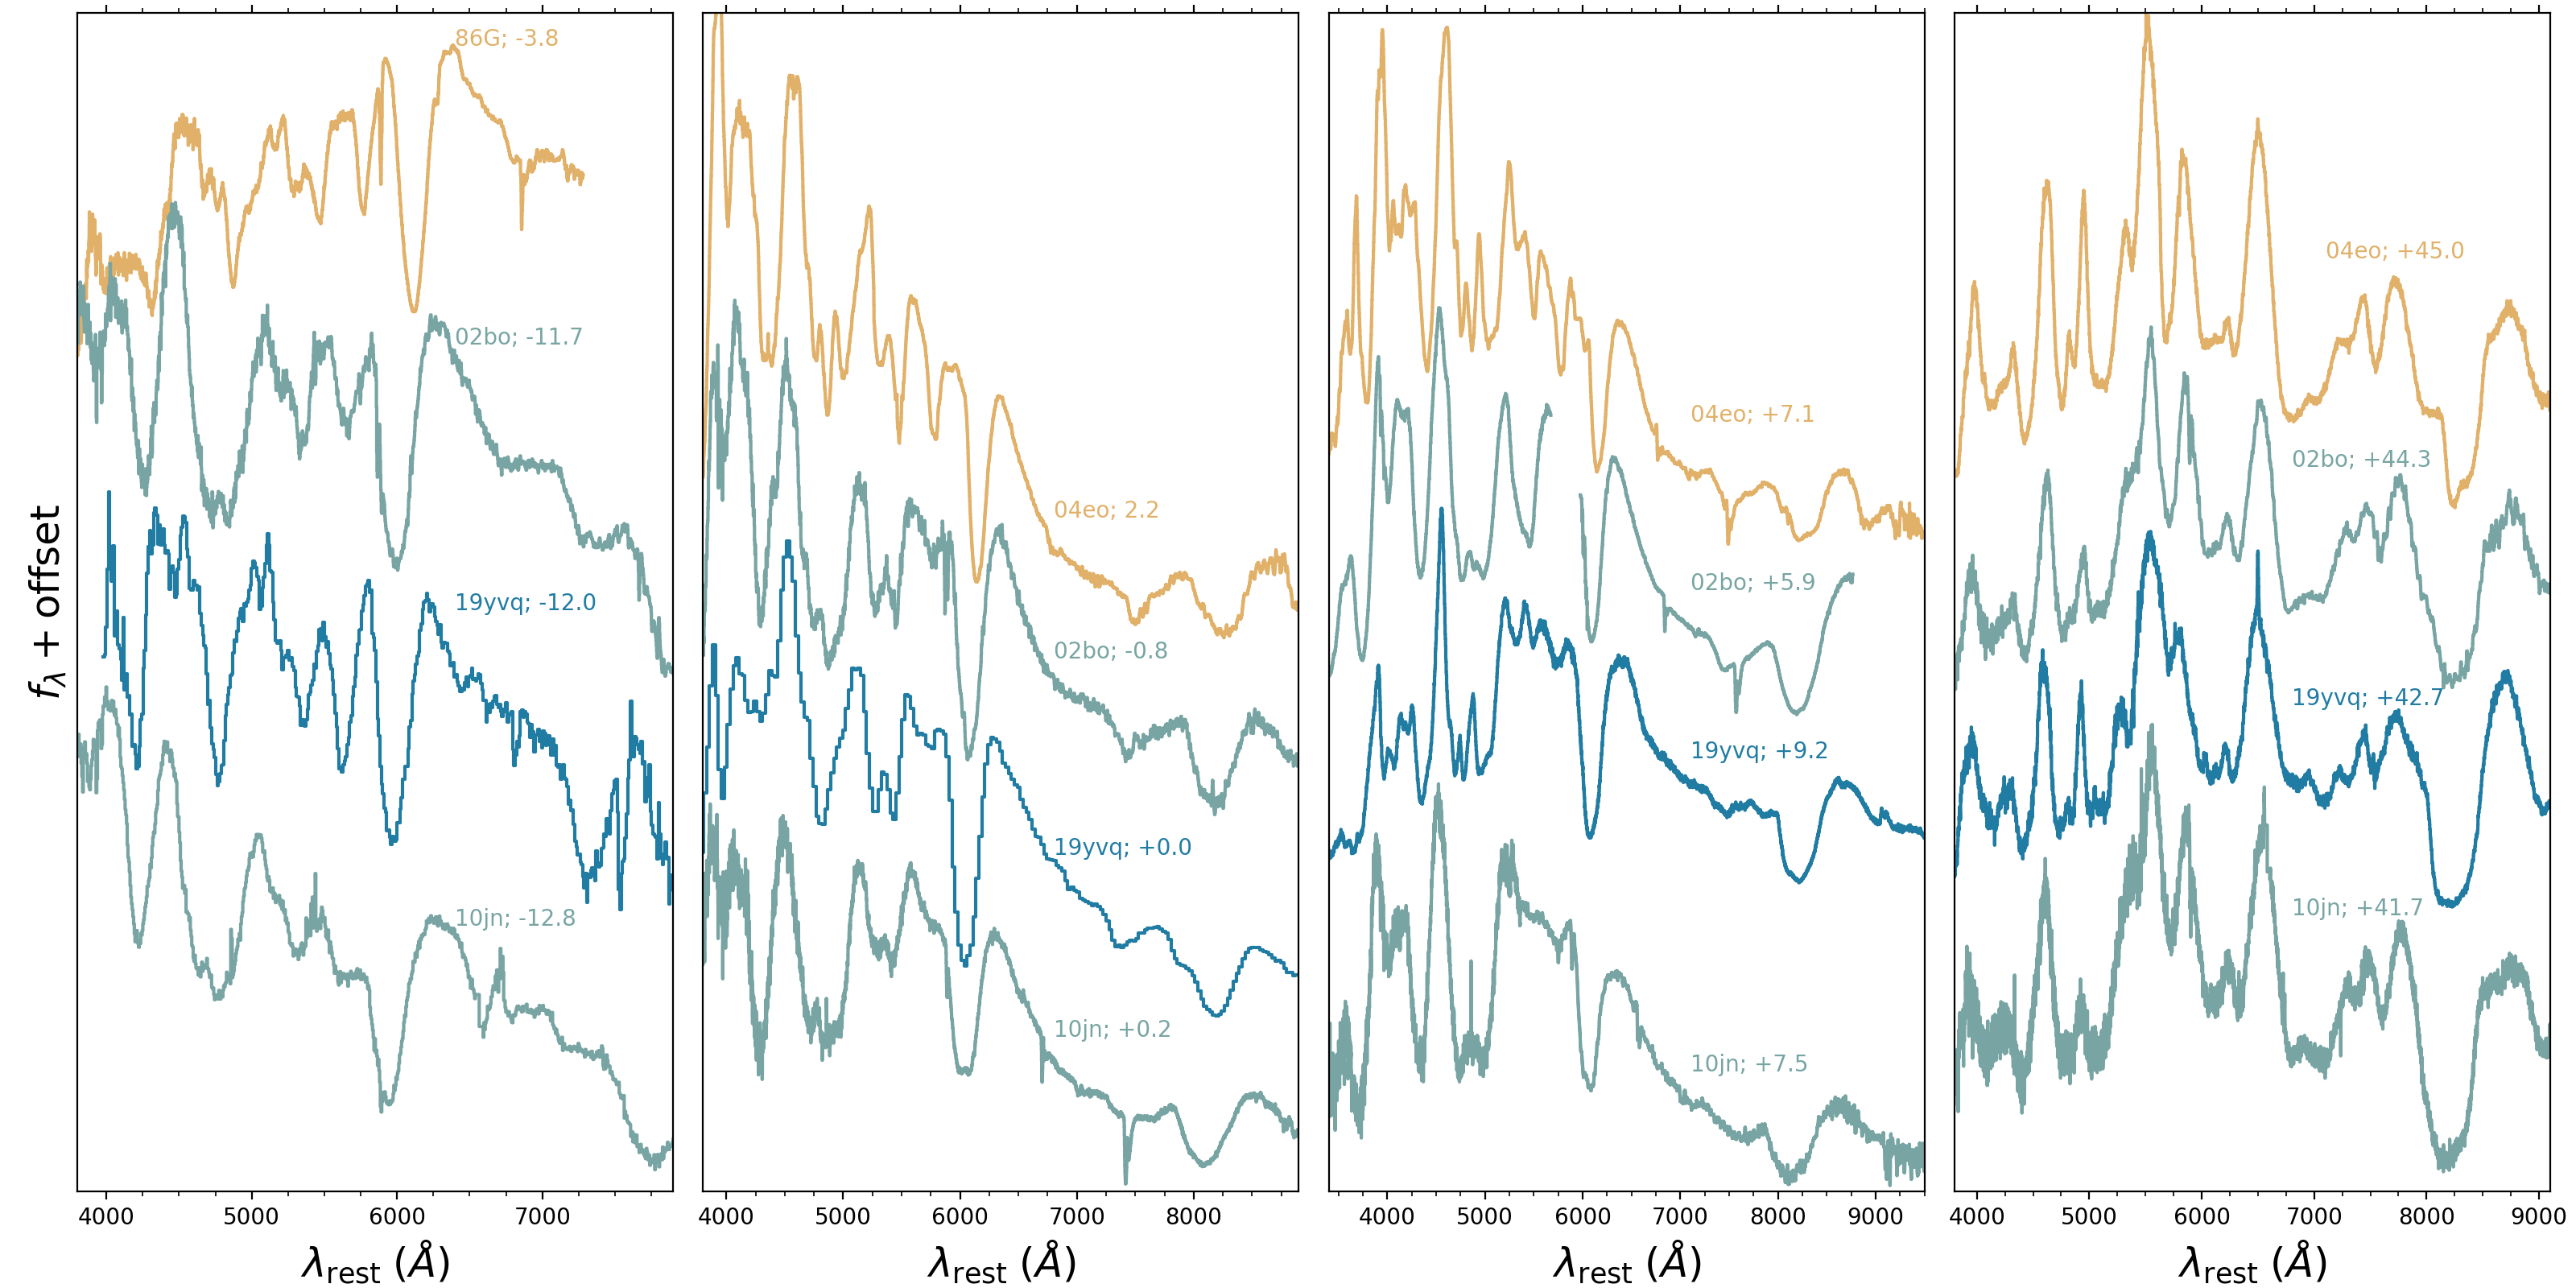

/Users/adamamiller/miniconda3/envs/emcee3/lib/python3.7/site-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in greater
/Users/adamamiller/miniconda3/envs/emcee3/lib/python3.7/site-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in less
/Users/adamamiller/miniconda3/envs/emcee3/lib/python3.7/site-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in greater


In [7]:
# PUT IT ALL TOGETHER
aam_colors = {'mustard': "#E29930",
             'blue': "#217CA3",
             'asphalt': "#32384D",
             'navy': "#444C5C",
             'punch': "#CE5A57",
             'ocean': "#78A5A3",
             'warm': "#E1B16A",}


fig, (ax1, ax2,  ax3, ax4) = plt.subplots(1, 4, figsize = (16,8))

#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200103_LT_v1.ascii'
phase = -12.0

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + 'SN2002bo_2002-03-11_06-14-24_Lick-3m_KAST_BSNIP.flm' # Silverman+12
z_02bo = 0.00424
phase_02bo = (52344.260 - 52356.0)/(1+z_02bo)

#86G
spec_86G = comp_dir + '1986G_1986-05-07_00-00-00_ESO-1.5m_BC-ESO_SUSPECT_0.dat' # Cristiani+1992
z_86G = 0.0018
phase_86G = -3.8
ebv_86G = 0.9

#10ygu
spec_10ygu = comp_dir + 'PTF10ygu_Keck_phase_-12.8.txt'
z_10ygu = 0.025047
phase_10ygu = -12.8

spec_86G_df = pd.read_csv(spec_86G, comment='#', delim_whitespace=True, header=None)
wv_86G, fl_86G = plot_box_spec(spec_86G_df[0].values.astype(float), spec_86G_df[1].values)
norm_flux = np.median(fl_86G[np.where((wv_86G + lambda_offset > 6400) & (wv_86G + lambda_offset < 6550))])
plot_region = np.where(wv_86G > 3600)
ax1.plot((wv_86G[plot_region] + lambda_offset)/(1+z_86G), fl_86G[plot_region]/norm_flux + 0.9, color=aam_colors['warm'])
ax1.text(6400, 2., '86G; {:.1f}'.format(phase_86G), color=aam_colors['warm'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
norm_flux = np.median(fl_02bo[np.where((wv_02bo > 6400) & (wv_02bo < 6550))])
ax1.plot(wv_02bo/(1+z_02bo), fl_02bo/norm_flux, color=aam_colors['ocean'])
ax1.text(6400, 1.1, '02bo; {:.1f}'.format(phase_02bo), color=aam_colors['ocean'])

spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)
wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
norm_flux = np.median(fl[np.where((wv > 6400) & (wv < 6550))])
ax1.plot(wv/(1+z), fl/norm_flux - 0.9, color=aam_colors['blue'])
ax1.text(6400, 0.3, '19yvq; {:.1f}'.format(phase), color=aam_colors['blue'])

spec_10ygu_df = pd.read_csv(spec_10ygu, comment='#', delim_whitespace=True, header=None)
wv_10ygu, fl_10ygu = plot_box_spec(spec_10ygu_df[0].values, spec_10ygu_df[1].values)
norm_flux = np.median(fl_10ygu[np.where((wv_10ygu > 6400) & (wv_10ygu < 6550))])
ax1.plot(wv_10ygu/(1+z_10ygu), fl_10ygu/norm_flux-1.65, color=aam_colors['ocean'])
ax1.text(6400, -0.65, '10jn; {:.1f}'.format(phase_10ygu), color=aam_colors['ocean'])

ax1.set_xlim(3800,7900)
ax1.set_ylim(-1.45, 2.1)
ax1.set_ylabel(r'$f_\lambda + \mathrm{offset}$', fontsize=18)










#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200115_P60_v1.ascii'
phase = 0.0

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + 'SN2002bo_2002-03-22_04-00-29_Lick-3m_KAST_BSNIP.flm'
z_02bo = 0.00424
phase_02bo = (52355.167 - 52356.0)/(1+z_02bo)

#10ygu
spec_10ygu = comp_dir + 'PTF10ygu_Gemini_phase_0.2.txt'
z_10ygu = 0.025047
phase_10ygu = 0.2

#86G
spec_86G = comp_dir + '1986G_1986-05-11_00-00-00_ESO-1.5m_BC-ESO_SUSPECT.dat' # Cristiani+1992
z_86G = 0.0018
phase_86G = 0.0

#04eo
spec_04eo =  comp_dir + '2004eo_2004-10-02_00-00-00_NOT_ALFOSC_SUSPECT.dat' # Pastorello+07
z_04eo = 0.015718
phase_04eo = 2.2

spec_04eo_df = pd.read_csv(spec_04eo, comment='#', delim_whitespace=True, header=None)
wv_04eo, fl_04eo = plot_box_spec(spec_04eo_df[0].values.astype(float), spec_04eo_df[1].values)
norm_flux = np.median(fl_04eo[np.where((wv_04eo > 6400) & (wv_04eo < 6550))])
ax2.plot(wv_04eo/(1+z_04eo), fl_04eo/norm_flux + 0.9, color=aam_colors['warm'])
ax2.text(6800, 1.5, '04eo; {:.1f}'.format(phase_04eo), color=aam_colors['warm'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
norm_flux = np.median(fl_02bo[np.where((wv_02bo > 6400) & (wv_02bo < 6550))])
ax2.plot(wv_02bo/(1+z_02bo), fl_02bo/norm_flux + 0.3, color=aam_colors['ocean'])
ax2.text(6800, 1, '02bo; {:.1f}'.format(phase_02bo), color=aam_colors['ocean'])


spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)
wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
norm_flux = np.median(fl[np.where((wv > 6400) & (wv < 6550))])
ax2.plot(wv/(1+z), fl/norm_flux - 0.4, color=aam_colors['blue'])
ax2.text(6800, 0.3, '19yvq; +{:.1f}'.format(phase), color=aam_colors['blue'])


spec_10ygu_df = pd.read_csv(spec_10ygu, comment='#', delim_whitespace=True, header=None)
wv_10ygu, fl_10ygu = plot_box_spec(spec_10ygu_df[0].values, spec_10ygu_df[1].values)
norm_flux = np.median(fl_10ygu[np.where((wv_10ygu > 6400) & (wv_10ygu < 6550))])
plot_region = np.where(wv_10ygu > 3600)
ax2.plot(wv_10ygu[plot_region]/(1+z_10ygu), fl_10ygu[plot_region]/norm_flux -1 , color=aam_colors['ocean'])
ax2.text(6800, -0.35, '10jn; +{:.1f}'.format(phase_10ygu), color=aam_colors['ocean'])



ax2.set_xlim(3800,8900)
ax2.set_ylim(-0.9, 3.3)










#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200124_Keck1_v1.ascii'
phase = 9.2

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + '2002bo_2002-03-28_00-00-00_WHT-4.2m_ISIS_SUSPECT.dat' # Benetti+04
z_02bo = 0.00424
phase_02bo = 5.9

#04eo
spec_04eo =  comp_dir + '2004eo_2004-10-07_00-00-00_CA-2.2m_CAFOS_SUSPECT.dat' # Pastorello+07
z_04eo = 0.015718
phase_04eo = 7.1

#10ygu
spec_10ygu = comp_dir + 'PTF10ygu_Kast_phase_7.5.txt'
z_10ygu = 0.025047
phase_10ygu = 7.5


spec_04eo_df = pd.read_csv(spec_04eo, comment='#', delim_whitespace=True, header=None)
wv_04eo, fl_04eo = plot_box_spec(spec_04eo_df[0].values, spec_04eo_df[1].values)
norm_flux = np.median(fl_04eo[np.where((wv_04eo > 6400) & (wv_04eo < 6550))])
ax3.plot(wv_04eo/(1+z_04eo), fl_04eo/norm_flux+1.4, color=aam_colors['warm'])
ax3.text(7100, 2, '04eo; +{:.1f}'.format(phase_04eo), color=aam_colors['warm'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
norm_flux = np.median(fl_02bo[np.where((wv_02bo > 6400) & (wv_02bo < 6550))])
plot_blue = np.where(wv_02bo < 5700)
ax3.plot(wv_02bo[plot_blue]/(1+z_02bo), fl_02bo[plot_blue]/norm_flux + 0.7, color=aam_colors['ocean'])
plot_red = np.where(wv_02bo > 6000)
ax3.plot(wv_02bo[plot_red]/(1+z_02bo), fl_02bo[plot_red]/norm_flux + 0.7, color=aam_colors['ocean'])
ax3.text(7100, 1.3, '02bo; +{:.1f}'.format(phase_02bo), color=aam_colors['ocean'])

spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)
wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
norm_flux = np.median(fl[np.where((wv > 6400) & (wv < 6550))])
ax3.plot(wv/(1+z), fl/norm_flux, color=aam_colors['blue'])
ax3.text(7100, 0.6, '19yvq; +{:.1f}'.format(phase), color=aam_colors['blue'])

spec_10ygu_df = pd.read_csv(spec_10ygu, comment='#', delim_whitespace=True, header=None)
wv_10ygu, fl_10ygu = plot_box_spec(spec_10ygu_df[0].values, spec_10ygu_df[1].values)
norm_flux = np.median(fl_10ygu[np.where((wv_10ygu > 6400) & (wv_10ygu < 6550))])
ax3.plot(wv_10ygu/(1+z_10ygu), fl_10ygu/norm_flux - 1.3, color=aam_colors['ocean'])
ax3.text(7100, -.7, '10jn; +{:.1f}'.format(phase_10ygu), color=aam_colors['ocean'])


ax3.set_xlim(3400,9500)
ax3.set_ylim(-1.2,3.7)








#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200227_P200_v1.ascii'
phase = 42.7

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + 'SN2002bo_2002-05-07_06-27-22_Lick-3m_KAST_BSNIP.flm' # Silverman+12
z_02bo = 0.00424
phase_02bo = 44.27


#10ygu
spec_10ygu = comp_dir + 'PTF10ygu_Keck_phase_41.7.txt'
z_10ygu = 0.025047
phase_10ygu = 41.7

#04eo
spec_04eo = comp_dir + 'SN2004eo_2004-11-14_00-00-00_Keck1_LRIS_BSNIP.flm' # Silverman+12
z_04eo = 0.015718
phase_04eo = 45

spec_04eo_df = pd.read_csv(spec_04eo, comment='#', delim_whitespace=True, header=None)
wv_04eo, fl_04eo = plot_box_spec(spec_04eo_df[0].values.astype(float), spec_04eo_df[1].values)
norm_flux = np.median(fl_04eo[np.where((wv_04eo > 6400) & (wv_04eo < 6550))])
ax4.plot(wv_04eo/(1+z_04eo), fl_04eo/norm_flux + 1.6, color=aam_colors['warm'])
ax4.text(7100, 2.7, '04eo; +{:.1f}'.format(phase_04eo), color=aam_colors['warm'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
norm_flux = np.median(fl_02bo[np.where((wv_02bo > 6400) & (wv_02bo < 6550))])
ax4.plot(wv_02bo/(1+z_02bo), fl_02bo/norm_flux + 0.9, color=aam_colors['ocean'])
ax4.text(6800, 1.85, '02bo; +{:.1f}'.format(phase_02bo), color=aam_colors['ocean'])


spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)
wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
norm_flux = np.median(fl[np.where((wv > 6400) & (wv < 6550))])
ax4.plot(wv/(1+z), fl/norm_flux+0.04, color=aam_colors['blue'])
ax4.text(6800, 0.88, '19yvq; +{:.1f}'.format(phase), color=aam_colors['blue'])

spec_10ygu_df = pd.read_csv(spec_10ygu, comment='#', delim_whitespace=True, header=None)
wv_10ygu, fl_10ygu = plot_box_spec(spec_10ygu_df[0].values, spec_10ygu_df[1].values)
norm_flux = np.median(fl_10ygu[np.where((wv_10ygu > 6400) & (wv_10ygu < 6550))])
ax4.plot(wv_10ygu/(1+z_10ygu), fl_10ygu/norm_flux - 1.3, color=aam_colors['ocean'])
ax4.text(6800, 0.025, '10jn; +{:.1f}'.format(phase_10ygu), color=aam_colors['ocean'])

ax4.set_xlim(3800,9100)
ax4.set_ylim(-1.1,3.7)









for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel(r'$\lambda_\mathrm{rest} \;  (\AA)$', fontsize=18)
    ax.set_yticks([])
    ax.tick_params(which='both', top=True)
    ax.xaxis.set_minor_locator(MultipleLocator(250))

fig.subplots_adjust(wspace=0.05,left=0.03,bottom=0.075,top=0.99,right=0.99)
fig.savefig('../paper/figures/spec_comp.pdf')

<IPython.core.display.Javascript object>


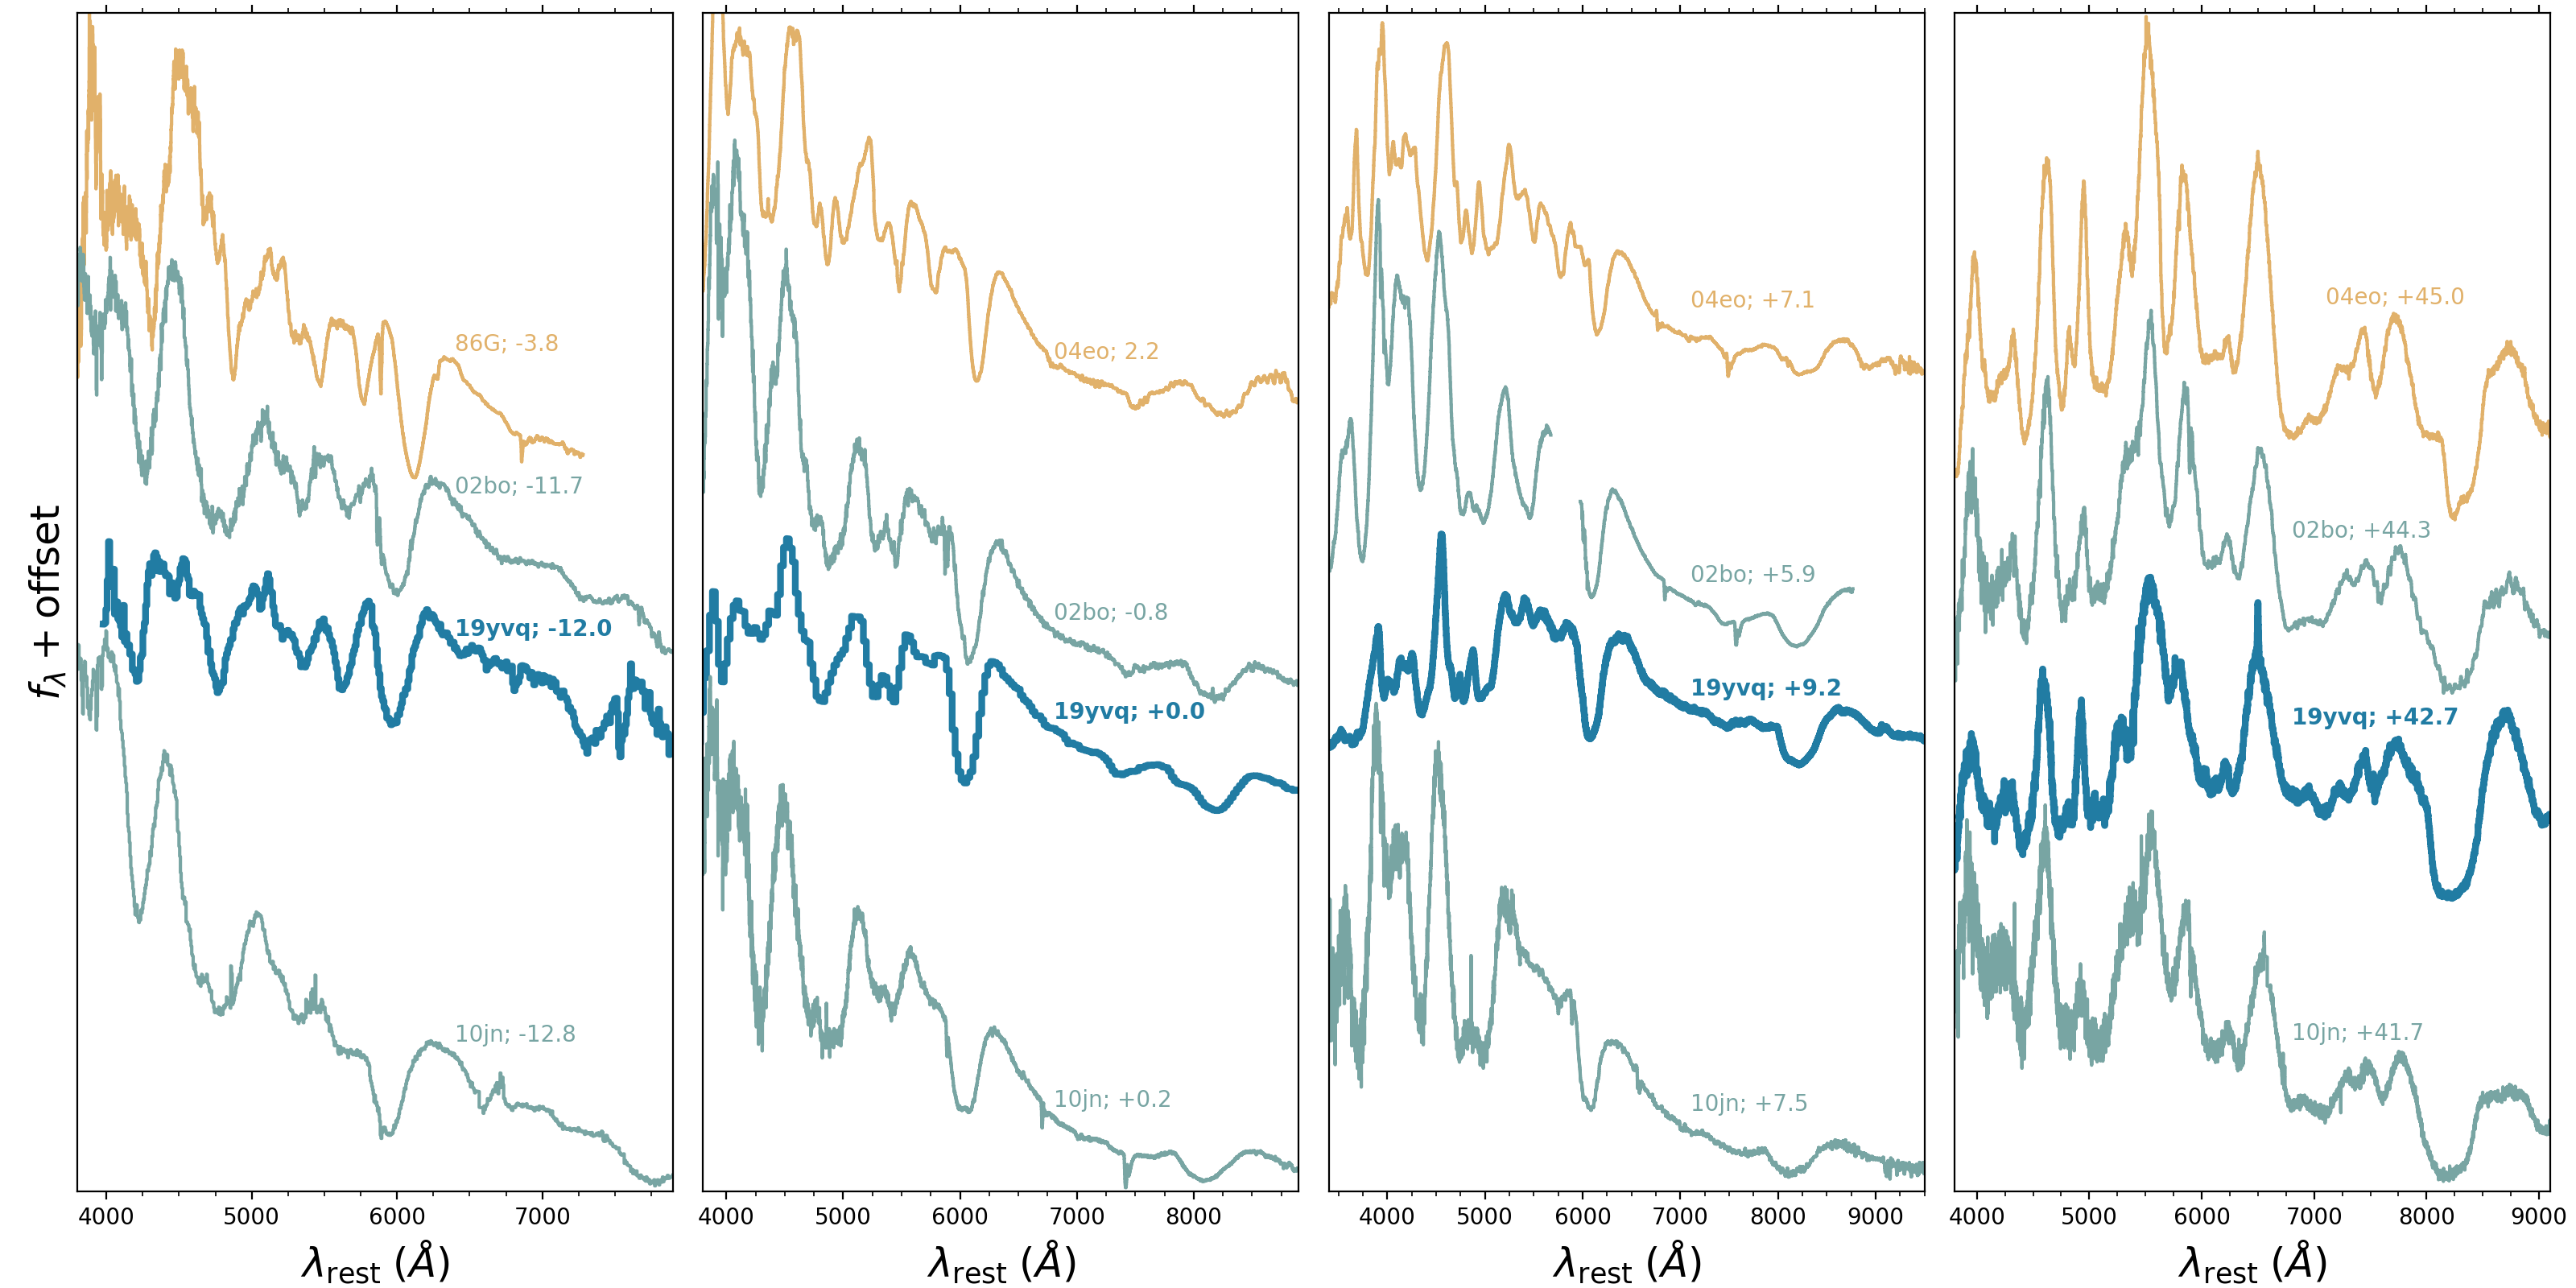

/Users/adamamiller/software/aam_python/dust_extinction/dust/extinction_cal.py:63: RuntimeWarning: invalid value encountered in less
  return np.piecewise( wv, [ wv < 2700, wv >= 2700 ], [ UVFunc, OptIRFunc ] )
/Users/adamamiller/software/aam_python/dust_extinction/dust/extinction_cal.py:63: RuntimeWarning: invalid value encountered in greater_equal
  return np.piecewise( wv, [ wv < 2700, wv >= 2700 ], [ UVFunc, OptIRFunc ] )
/Users/adamamiller/miniconda3/envs/emcee3/lib/python3.7/site-packages/ipykernel_launcher.py:139: RuntimeWarning: invalid value encountered in greater
/Users/adamamiller/miniconda3/envs/emcee3/lib/python3.7/site-packages/ipykernel_launcher.py:139: RuntimeWarning: invalid value encountered in less
/Users/adamamiller/miniconda3/envs/emcee3/lib/python3.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in greater


In [8]:
# PUT IT ALL TOGETHER
aam_colors = {'mustard': "#E29930",
             'blue': "#217CA3",
             'asphalt': "#32384D",
             'navy': "#444C5C",
             'punch': "#CE5A57",
             'ocean': "#78A5A3",
             'warm': "#E1B16A",}


fig, (ax1, ax2,  ax3, ax4) = plt.subplots(1, 4, figsize = (16,8))

#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200103_LT_v1.ascii'
phase = -12.0 
ebv = 0.05

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + 'SN2002bo_2002-03-11_06-14-24_Lick-3m_KAST_BSNIP.flm' # Silverman+12
z_02bo = 0.00424
phase_02bo = (52344.260 - 52356.0)/(1+z_02bo)
ebv_02bo = 0.38

#86G
spec_86G = comp_dir + '1986G_1986-05-07_00-00-00_ESO-1.5m_BC-ESO_SUSPECT_0.dat' # Cristiani+1992
z_86G = 0.0018
phase_86G = -3.8
ebv_86G = 0.9

#10ygu
spec_10ygu = comp_dir + 'PTF10ygu_Keck_phase_-12.8.txt'
z_10ygu = 0.025047
phase_10ygu = -12.8
ebv_10ygu = 0.39

spec_86G_df = pd.read_csv(spec_86G, comment='#', delim_whitespace=True, header=None)
wv_86G, fl_86G = plot_box_spec(spec_86G_df[0].values.astype(float), spec_86G_df[1].values)
alambda = extinction_cal.calALambda((wv_86G + lambda_offset)/(1+z_86G), 3.1, ebv_86G)
ext_fl_86G = fl_86G*10**(0.4*alambda)
norm_flux = np.median(ext_fl_86G[np.where((wv_86G + lambda_offset > 6400) & (wv_86G + lambda_offset < 6550))])
plot_region = np.where(wv_86G > 3600)
ax1.plot((wv_86G[plot_region]+116)/(1+z_86G), ext_fl_86G[plot_region]/norm_flux + 0.9, color=aam_colors['warm'])
ax1.text(6400, 2.1, '86G; {:.1f}'.format(phase_86G), color=aam_colors['warm'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
alambda = extinction_cal.calALambda(wv_02bo/(1+z_02bo), 3.1, ebv_02bo)
ext_fl_02bo = fl_02bo*10**(0.4*alambda)
norm_flux = np.median(ext_fl_02bo[np.where((wv_02bo/(1+z_02bo) > 6400) & (wv_02bo/(1+z_02bo) < 6550))])
ax1.plot(wv_02bo/(1+z_02bo), ext_fl_02bo/norm_flux, color=aam_colors['ocean'])
ax1.text(6400, 1.15, '02bo; {:.1f}'.format(phase_02bo), color=aam_colors['ocean'])

spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)
wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
alambda = extinction_cal.calALambda(wv/(1+z), 3.1, ebv)
ext_fl = fl*10**(0.4*alambda)
norm_flux = np.median(ext_fl[np.where((wv/(1+z) > 6400) & (wv/(1+z) < 6550))])
ax1.plot(wv/(1+z), ext_fl/norm_flux - 0.9, color=aam_colors['blue'], lw=3)
ax1.text(6400, 0.2, '19yvq; {:.1f}'.format(phase), color=aam_colors['blue'], weight='bold')

spec_10ygu_df = pd.read_csv(spec_10ygu, comment='#', delim_whitespace=True, header=None)
wv_10ygu, fl_10ygu = plot_box_spec(spec_10ygu_df[0].values, spec_10ygu_df[1].values)
alambda = extinction_cal.calALambda(wv_10ygu/(1+z_10ygu), 3.1, ebv_10ygu)
ext_fl_10ygu = fl_10ygu*10**(0.4*alambda)
norm_flux = np.median(ext_fl_10ygu[np.where((wv_10ygu/(1+z_10ygu) > 6400) & (wv_10ygu/(1+z_10ygu) < 6550))])
ax1.plot(wv_10ygu/(1+z_10ygu), ext_fl_10ygu/norm_flux-3.7, color=aam_colors['ocean'])
ax1.text(6400, -2.5, '10jn; {:.1f}'.format(phase_10ygu), color=aam_colors['ocean'])

ax1.set_xlim(3800,7900)
ax1.set_ylim(-3.5, 4.35)
ax1.set_ylabel(r'$f_\lambda + \mathrm{offset}$', fontsize=18)










#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200115_P60_v1.ascii'
phase = 0.0

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + 'SN2002bo_2002-03-22_04-00-29_Lick-3m_KAST_BSNIP.flm'
z_02bo = 0.00424
phase_02bo = (52355.167 - 52356.0)/(1+z_02bo)

#10ygu
spec_10ygu = comp_dir + 'PTF10ygu_Gemini_phase_0.2.txt'
z_10ygu = 0.025047
phase_10ygu = 0.2

#86G
spec_86G = comp_dir + '1986G_1986-05-11_00-00-00_ESO-1.5m_BC-ESO_SUSPECT.dat' # Cristiani+1992
z_86G = 0.0018
phase_86G = 0.0

#04eo
spec_04eo =  comp_dir + '2004eo_2004-10-02_00-00-00_NOT_ALFOSC_SUSPECT.dat' # Pastorello+07
z_04eo = 0.015718
phase_04eo = 2.2
ebv_04eo = 0.109

spec_04eo_df = pd.read_csv(spec_04eo, comment='#', delim_whitespace=True, header=None)
wv_04eo, fl_04eo = plot_box_spec(spec_04eo_df[0].values.astype(float), spec_04eo_df[1].values)
alambda = extinction_cal.calALambda(wv_04eo, 3.1, ebv_04eo)
ext_fl_04eo = fl_04eo*10**(0.4*alambda)
norm_flux = np.median(ext_fl_04eo[np.where((wv_04eo/(1+z_04eo) > 6400) & (wv_04eo/(1+z_04eo) < 6550))])
ax2.plot(wv_04eo/(1+z_04eo), ext_fl_04eo/norm_flux + 2.4, color=aam_colors['warm'])
ax2.text(6800, 3, '04eo; {:.1f}'.format(phase_04eo), color=aam_colors['warm'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
alambda = extinction_cal.calALambda(wv_02bo/(1+z_02bo), 3.1, ebv_02bo)
ext_fl_02bo = fl_02bo*10**(0.4*alambda)
norm_flux = np.median(ext_fl_02bo[np.where((wv_02bo/(1+z_02bo) > 6400) & (wv_02bo/(1+z_02bo) < 6550))])
ax2.plot(wv_02bo/(1+z_02bo), ext_fl_02bo/norm_flux + 0.45, color=aam_colors['ocean'])
ax2.text(6800, 1.15, '02bo; {:.1f}'.format(phase_02bo), color=aam_colors['ocean'])


spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)
wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
alambda = extinction_cal.calALambda(wv/(1+z), 3.1, ebv)
ext_fl = fl*10**(0.4*alambda)
norm_flux = np.median(ext_fl[np.where((wv/(1+z) > 6400) & (wv/(1+z) < 6550))])
ax2.plot(wv/(1+z), ext_fl/norm_flux - 0.33, color=aam_colors['blue'], lw=3)
ax2.text(6800, 0.45, '19yvq; +{:.1f}'.format(phase), color=aam_colors['blue'], weight='bold')


spec_10ygu_df = pd.read_csv(spec_10ygu, comment='#', delim_whitespace=True, header=None)
wv_10ygu, fl_10ygu = plot_box_spec(spec_10ygu_df[0].values, spec_10ygu_df[1].values)
alambda = extinction_cal.calALambda(wv_10ygu/(1+z_10ygu), 3.1, ebv_10ygu)
ext_fl_10ygu = fl_10ygu*10**(0.4*alambda)
norm_flux = np.median(ext_fl_10ygu[np.where((wv_10ygu/(1+z_10ygu) > 6400) & (wv_10ygu/(1+z_10ygu) < 6550))])
plot_region = np.where(wv_10ygu > 3600)
ax2.plot(wv_10ygu[plot_region]/(1+z_10ygu), ext_fl_10ygu[plot_region]/norm_flux -3. , color=aam_colors['ocean'])
ax2.text(6800, -2.3, '10jn; +{:.1f}'.format(phase_10ygu), color=aam_colors['ocean'])



ax2.set_xlim(3800,8900)
ax2.set_ylim(-2.9,5.45)










#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200124_Keck1_v1.ascii'
phase = 9.2

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + '2002bo_2002-03-28_00-00-00_WHT-4.2m_ISIS_SUSPECT.dat' # Benetti+04
z_02bo = 0.00424
phase_02bo = 5.9

#04eo
spec_04eo =  comp_dir + '2004eo_2004-10-07_00-00-00_CA-2.2m_CAFOS_SUSPECT.dat' # Pastorello+07
z_04eo = 0.015718
phase_04eo = 7.1

#10ygu
spec_10ygu = comp_dir + 'PTF10ygu_Kast_phase_7.5.txt'
z_10ygu = 0.025047
phase_10ygu = 7.5


spec_04eo_df = pd.read_csv(spec_04eo, comment='#', delim_whitespace=True, header=None)
wv_04eo, fl_04eo = plot_box_spec(spec_04eo_df[0].values, spec_04eo_df[1].values)
alambda = extinction_cal.calALambda(wv_04eo, 3.1, ebv_04eo)
ext_fl_04eo = fl_04eo*10**(0.4*alambda)
norm_flux = np.median(ext_fl_04eo[np.where((wv_04eo > 6400) & (wv_04eo < 6550))])
ax3.plot(wv_04eo/(1+z_04eo), ext_fl_04eo/norm_flux+2.7, color=aam_colors['warm'])
ax3.text(7100, 3.3, '04eo; +{:.1f}'.format(phase_04eo), color=aam_colors['warm'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
alambda = extinction_cal.calALambda(wv_02bo/(1+z_02bo), 3.1, ebv_02bo)
ext_fl_02bo = fl_02bo*10**(0.4*alambda)
norm_flux = np.median(ext_fl_02bo[np.where((wv_02bo/(1+z_02bo) > 6400) & (wv_02bo/(1+z_02bo) < 6550))])
plot_blue = np.where(wv_02bo < 5700)
ax3.plot(wv_02bo[plot_blue]/(1+z_02bo), ext_fl_02bo[plot_blue]/norm_flux + 0.7, color=aam_colors['ocean'])
plot_red = np.where(wv_02bo > 6000)
ax3.plot(wv_02bo[plot_red]/(1+z_02bo), ext_fl_02bo[plot_red]/norm_flux + 0.7, color=aam_colors['ocean'])
ax3.text(7100, 1.25, '02bo; +{:.1f}'.format(phase_02bo), color=aam_colors['ocean'])

spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)
wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
alambda = extinction_cal.calALambda(wv/(1+z), 3.1, ebv)
ext_fl = fl*10**(0.4*alambda)
norm_flux = np.median(ext_fl[np.where((wv/(1+z) > 6400) & (wv/(1+z) < 6550))])
ax3.plot(wv/(1+z), ext_fl/norm_flux - 0.2, color=aam_colors['blue'], lw=3)
ax3.text(7100, 0.4, '19yvq; +{:.1f}'.format(phase), color=aam_colors['blue'], weight='bold')

spec_10ygu_df = pd.read_csv(spec_10ygu, comment='#', delim_whitespace=True, header=None)
wv_10ygu, fl_10ygu = plot_box_spec(spec_10ygu_df[0].values, spec_10ygu_df[1].values)
alambda = extinction_cal.calALambda(wv_10ygu/(1+z_10ygu), 3.1, ebv_10ygu)
ext_fl_10ygu = fl_10ygu*10**(0.4*alambda)
norm_flux = np.median(ext_fl_10ygu[np.where((wv_10ygu/(1+z_10ygu) > 6400) & (wv_10ygu/(1+z_10ygu) < 6550))])
ax3.plot(wv_10ygu/(1+z_10ygu), ext_fl_10ygu/norm_flux - 3.3, color=aam_colors['ocean'])
ax3.text(7100, -2.7, '10jn; +{:.1f}'.format(phase_10ygu), color=aam_colors['ocean'])


ax3.set_xlim(3400,9500)
ax3.set_ylim(-3.3,5.5)








#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200227_P200_v1.ascii'
phase = 42.7

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + 'SN2002bo_2002-05-07_06-27-22_Lick-3m_KAST_BSNIP.flm' # Silverman+12
z_02bo = 0.00424
phase_02bo = 44.27


#10ygu
spec_10ygu = comp_dir + 'PTF10ygu_Keck_phase_41.7.txt'
z_10ygu = 0.025047
phase_10ygu = 41.7

#04eo
spec_04eo = comp_dir + 'SN2004eo_2004-11-14_00-00-00_Keck1_LRIS_BSNIP.flm' # Silverman+12
z_04eo = 0.015718
phase_04eo = 45

spec_04eo_df = pd.read_csv(spec_04eo, comment='#', delim_whitespace=True, header=None)
wv_04eo, fl_04eo = plot_box_spec(spec_04eo_df[0].values.astype(float), spec_04eo_df[1].values)
alambda = extinction_cal.calALambda(wv_04eo, 3.1, ebv_04eo)
ext_fl_04eo = fl_04eo*10**(0.4*alambda)
norm_flux = np.median(ext_fl_04eo[np.where((wv_04eo > 6400) & (wv_04eo < 6550))])
ax4.plot(wv_04eo/(1+z_04eo), ext_fl_04eo/norm_flux + 1.6, color=aam_colors['warm'])
ax4.text(7100, 2.6, '04eo; +{:.1f}'.format(phase_04eo), color=aam_colors['warm'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
alambda = extinction_cal.calALambda(wv_02bo/(1+z_02bo), 3.1, ebv_02bo)
ext_fl_02bo = fl_02bo*10**(0.4*alambda)
norm_flux = np.median(ext_fl_02bo[np.where((wv_02bo/(1+z_02bo) > 6400) & (wv_02bo/(1+z_02bo) < 6550))])
ax4.plot(wv_02bo/(1+z_02bo), ext_fl_02bo/norm_flux + 0.9, color=aam_colors['ocean'])
ax4.text(6800, 1.6, '02bo; +{:.1f}'.format(phase_02bo), color=aam_colors['ocean'])


spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)
wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
alambda = extinction_cal.calALambda(wv/(1+z), 3.1, ebv)
ext_fl = fl*10**(0.4*alambda)
norm_flux = np.median(ext_fl[np.where((wv/(1+z) > 6400) & (wv/(1+z) < 6550))])
ax4.plot(wv/(1+z), ext_fl/norm_flux+0.04, color=aam_colors['blue'], lw=3)
ax4.text(6800, 0.8, '19yvq; +{:.1f}'.format(phase), color=aam_colors['blue'], weight='bold')

spec_10ygu_df = pd.read_csv(spec_10ygu, comment='#', delim_whitespace=True, header=None)
wv_10ygu, fl_10ygu = plot_box_spec(spec_10ygu_df[0].values, spec_10ygu_df[1].values)
alambda = extinction_cal.calALambda(wv_10ygu/(1+z_10ygu), 3.1, ebv_10ygu)
ext_fl_10ygu = fl_10ygu*10**(0.4*alambda)
norm_flux = np.median(ext_fl_10ygu[np.where((wv_10ygu/(1+z_10ygu) > 6400) & (wv_10ygu/(1+z_10ygu) < 6550))])
ax4.plot(wv_10ygu/(1+z_10ygu), ext_fl_10ygu/norm_flux - 1.3, color=aam_colors['ocean'])
ax4.text(6800, -0.55, '10jn; +{:.1f}'.format(phase_10ygu), color=aam_colors['ocean'])

ax4.set_xlim(3800,9100)
ax4.set_ylim(-1.2,3.85)









for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel(r'$\lambda_\mathrm{rest} \;  (\AA)$', fontsize=18)
    ax.set_yticks([])
    ax.tick_params(which='both', top=True)
    ax.xaxis.set_minor_locator(MultipleLocator(250))

fig.subplots_adjust(wspace=0.05,left=0.03,bottom=0.075,top=0.99,right=0.99)
fig.savefig('../paper/figures/spec_comp_extinction.pdf')